In [3]:
library(tidyverse)
library(ggthemes)
library(viridis)

In [4]:
data <- read_csv(file = '../data//z24_vibrations.csv')

Parsed with column specification:
cols(
  `03` = col_double(),
  `05` = col_double(),
  `06` = col_double(),
  `07` = col_double(),
  `10` = col_double(),
  `12` = col_double(),
  `14` = col_double(),
  `16` = col_double()
)


In [5]:
Time <- seq(0,1,0.0001)
Correct <- 0.05+Time*sin(Time*6)+0.01#*rnorm(1000)
Acceleration <- 0.01+1.2*Time*sin(Time*6)#+0.01*rnorm(1000)
Predicted_high <- Acceleration + 0.1
Predicted_low <- Acceleration - 0.1

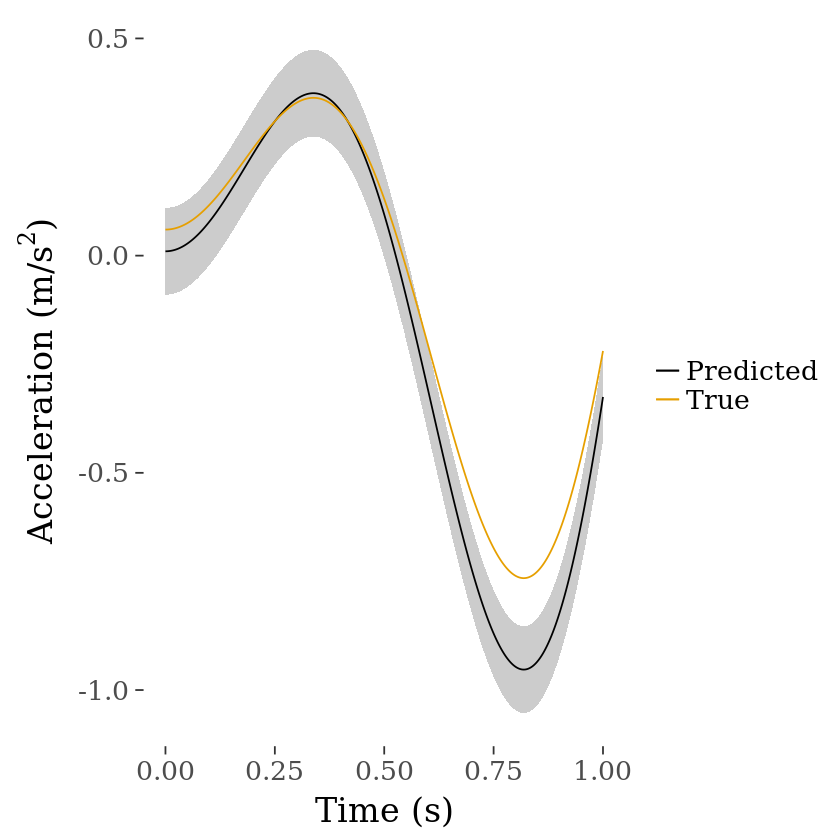

In [6]:
df <- data.frame(Time, Correct, Acceleration, Predicted_high, Predicted_low)

p1 <- ggplot(df, aes(x=Time)) + 
geom_ribbon(aes(ymin=Predicted_low, ymax=Predicted_high), fill = "grey80") +
geom_line(aes(y=Acceleration, color='Predicted'))+
geom_line(aes(x = Time, y = Correct, color='True')) +
theme_tufte(base_size = 20) + 
theme(legend.title=element_blank()) +
scale_color_colorblind() +
labs(x = "Time (s)", y = expression(paste("Acceleration (m/s"^"2", ")")))

p1

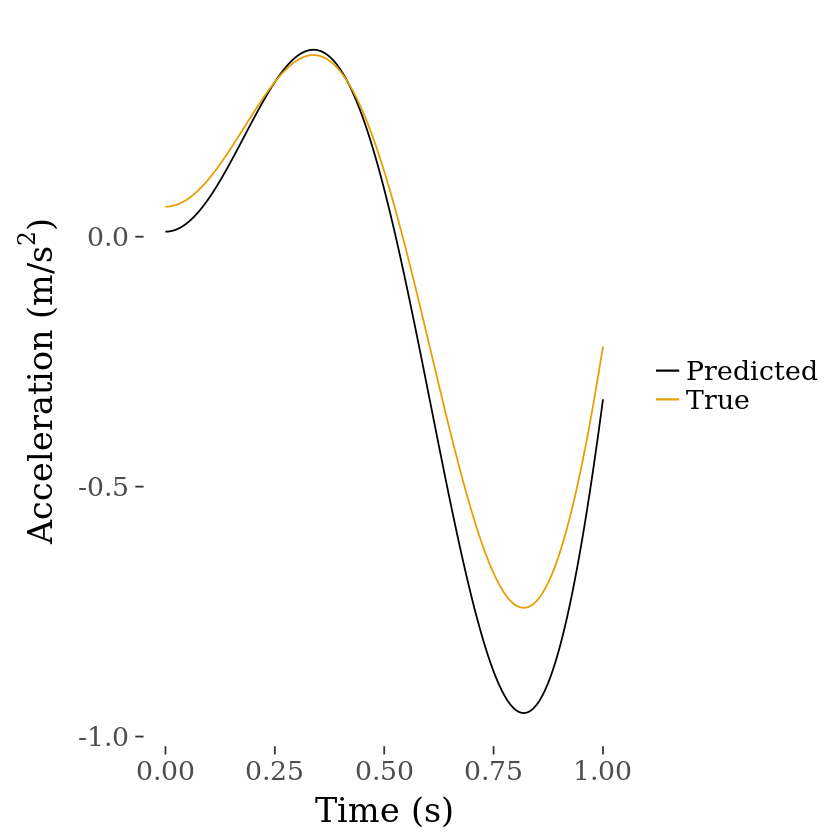

In [7]:
p2 <- ggplot(df, aes(x=Time)) + 
geom_line(aes(y=Acceleration, color='Predicted'))+
geom_line(aes(x = Time, y = Correct, color='True')) +
theme_tufte(base_size = 20) + 
theme(legend.title=element_blank()) + 
scale_color_colorblind() +
labs(x = "Time (s)", y = expression(paste("Acceleration (m/s"^"2", ")")))

p2

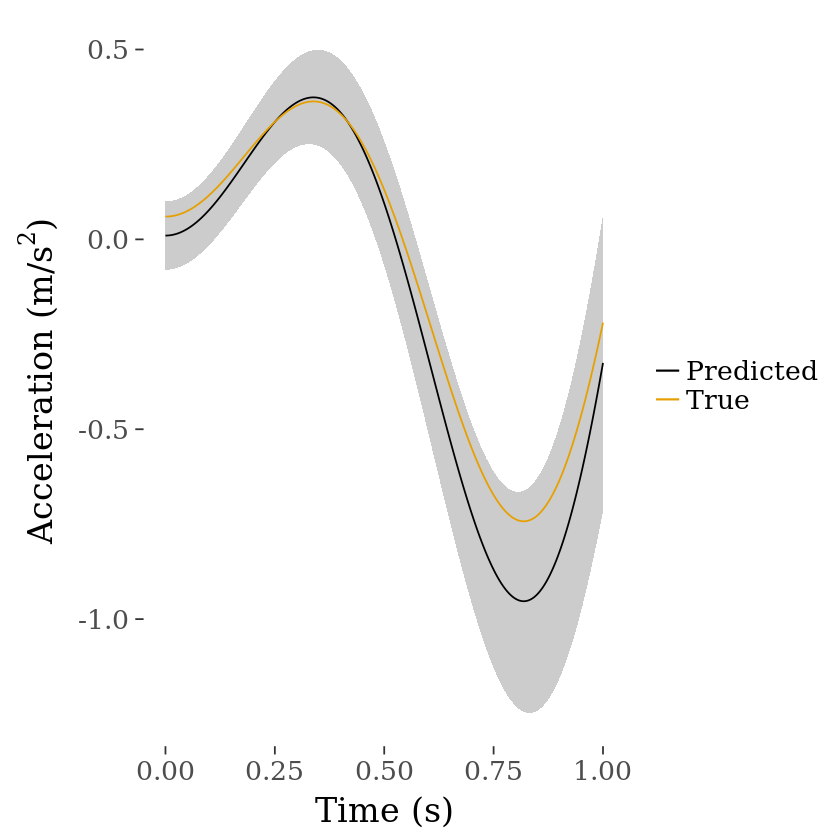

In [8]:
p3 <- ggplot(df, aes(x=Time)) + 
geom_ribbon(aes(ymin=Acceleration - 0.09-0.3*Time^2, ymax=Acceleration + 0.09+0.3*Time^2),fill = "grey80") +
geom_line(aes(y=Acceleration, color='Predicted'))+geom_line(aes(x = Time, y = Correct, color='True')) +
theme_tufte(base_size = 20) +  
theme(legend.title=element_blank()) +
scale_color_colorblind() + 
labs(x = "Time (s)", y = expression(paste("Acceleration (m/s"^"2", ")")))

p3

In [7]:
ggsave(filename="no_predictive_uncertainty.pdf", plot=p2, width = 10, height = 4)
ggsave(filename="with_uncertainty.pdf", plot=p3, width = 10, height = 4)
ggsave(filename="with_uncertainty_anomaly.pdf", plot=p1, width = 10, height = 4)

In [9]:
data <- read_csv(file = '../data//z24_vibrations.csv')
data$Seconds <- seq(0,nrow(data)-1)*0.01
tidydf <- gather(data, key = 'Sensor', value = 'Acceleration', -Seconds)
tidydf$Sensor <- as.factor(tidydf$Sensor)

Parsed with column specification:
cols(
  `03` = col_double(),
  `05` = col_double(),
  `06` = col_double(),
  `07` = col_double(),
  `10` = col_double(),
  `12` = col_double(),
  `14` = col_double(),
  `16` = col_double()
)


In [10]:
p4 <- ggplot(tidydf, aes(x = Seconds, y = Acceleration)) +
geom_line(aes(color = Sensor), size=0.1, alpha=1) +
facet_grid(Sensor ~ . , scales = "free_y") + 
theme_tufte() + theme(legend.position = "none") + 
scale_y_continuous(labels = function(x) format(x, scientific = FALSE)) +
scale_color_colorblind() +
labs(x = "Time (s)", y = expression(paste("Acceleration (m/s"^"2", ")")))


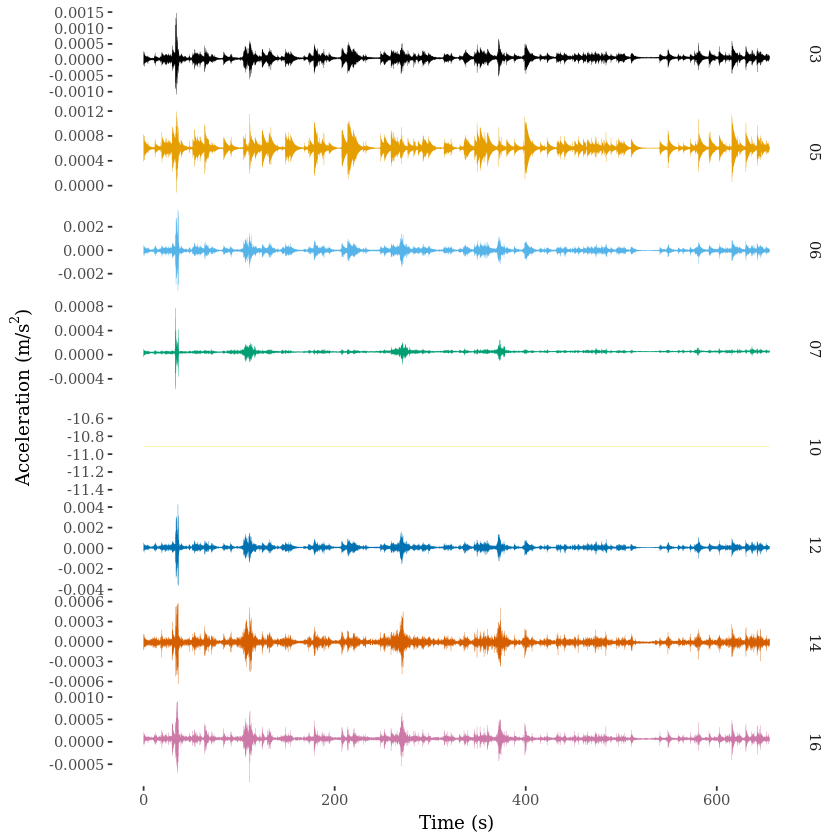

In [11]:
p4

In [11]:
ggsave(filename="z24_full_vibration.png", plot=p4)#, width = 10, height = 4)

Saving 6.67 x 6.67 in image


Parsed with column specification:
cols(
  `03` = col_double(),
  `05` = col_double(),
  `06` = col_double(),
  `07` = col_double(),
  `10` = col_double(),
  `12` = col_double(),
  `14` = col_double(),
  `16` = col_double()
)


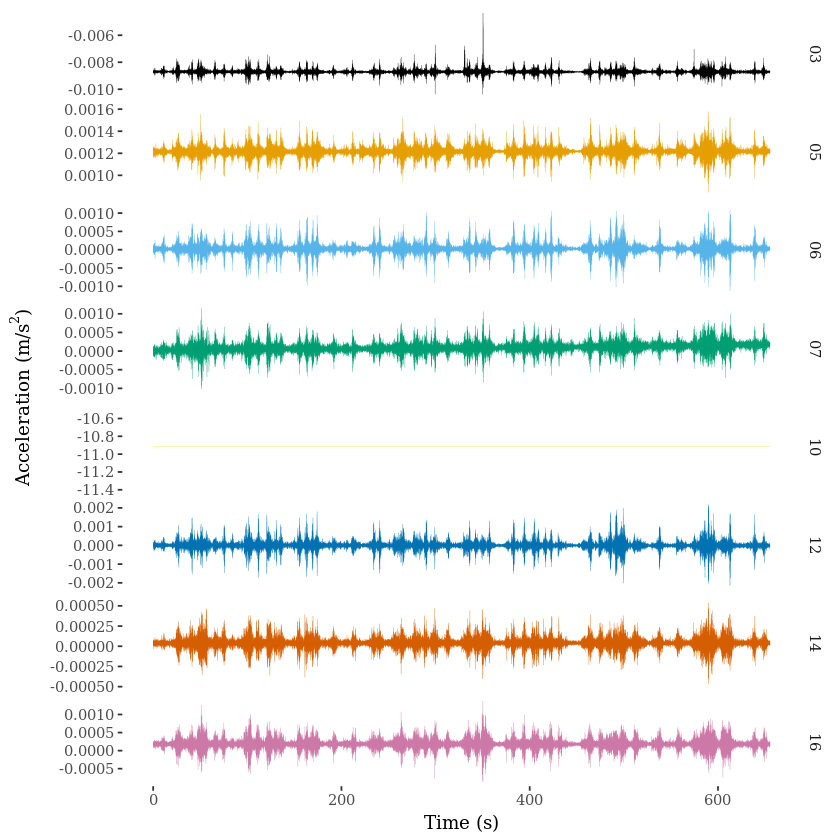

In [12]:
data <- read_csv(file = '../data//z24_vibrations_damaged.csv')
data$Seconds <- seq(0,nrow(data)-1)*0.01
tidydf <- gather(data, key = 'Sensor', value = 'Acceleration', -Seconds)
tidydf$Sensor <- as.factor(tidydf$Sensor)

p4_d <- ggplot(tidydf, aes(x = Seconds, y = Acceleration)) +
geom_line(aes(color = Sensor), size=0.1, alpha=1) +
facet_grid(Sensor ~ . , scales = "free_y") + 
theme_tufte() + theme(legend.position = "none") + 
scale_y_continuous(labels = function(x) format(x, scientific = FALSE)) +
scale_color_colorblind() +
labs(x = "Time (s)", y = expression(paste("Acceleration (m/s"^"2", ")")))
                   
                
p4_d   

In [13]:
ggsave(filename="z24_full_vibration_damaged.png", plot=p4_d)#, width = 10, height = 4)

Saving 6.67 x 6.67 in image


In [13]:
data <- read_csv(file = '../data//z24_vibrations.csv')
names <- colnames(data)

data$Seconds <- seq(0,nrow(data)-1)*0.01
slice <- head(data,100) 
colnames(slice) <- c(names,"Seconds")
slicetidydf <- gather(slice, key = 'Sensor', value = 'Acceleration', -Seconds)
slicetidydf$Sensor <- as.factor(slicetidydf$Sensor) 

Parsed with column specification:
cols(
  `03` = col_double(),
  `05` = col_double(),
  `06` = col_double(),
  `07` = col_double(),
  `10` = col_double(),
  `12` = col_double(),
  `14` = col_double(),
  `16` = col_double()
)


In [14]:
p5 <- ggplot(slicetidydf, aes(x = Seconds, y = Acceleration)) +
geom_line(aes(color = Sensor)) +
facet_grid(Sensor ~ . , scales = "free_y") + 
theme_tufte() +
theme(legend.position = "none") + 
scale_y_continuous(labels = function(x) format(x, scientific = FALSE)) +
scale_color_colorblind() + 
labs(x = "Time (s)", y = expression(paste("Acceleration (m/s"^"2", ")")))


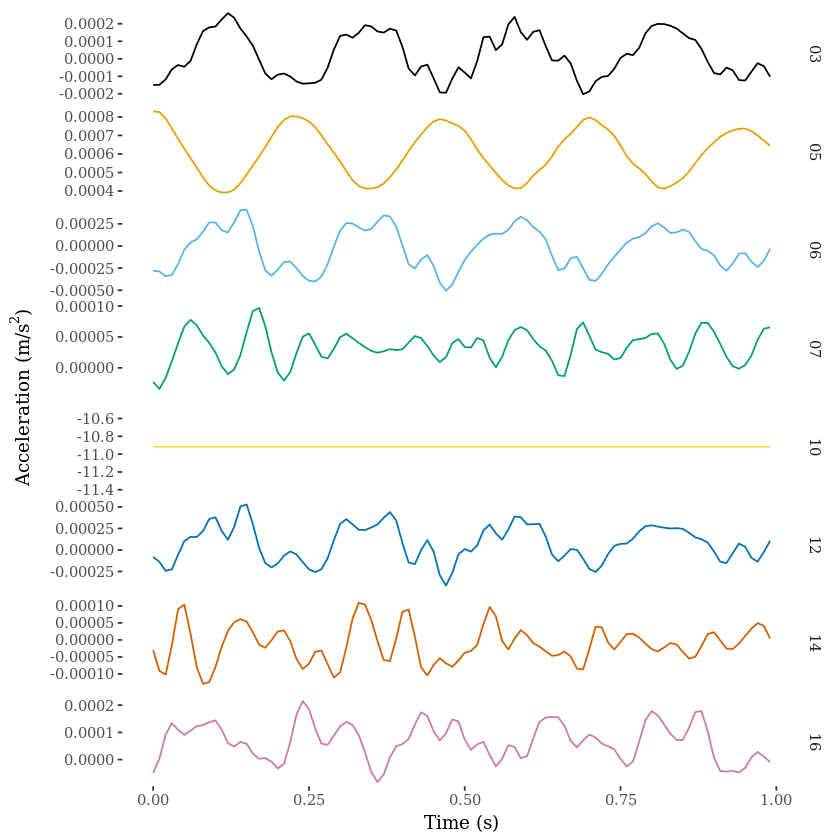

In [15]:
p5

In [17]:
ggsave(filename="z24_sliding_window.pdf", plot=p5)

Saving 6.67 x 6.67 in image


Parsed with column specification:
cols(
  `03` = col_double(),
  `05` = col_double(),
  `06` = col_double(),
  `07` = col_double(),
  `10` = col_double(),
  `12` = col_double(),
  `14` = col_double(),
  `16` = col_double()
)


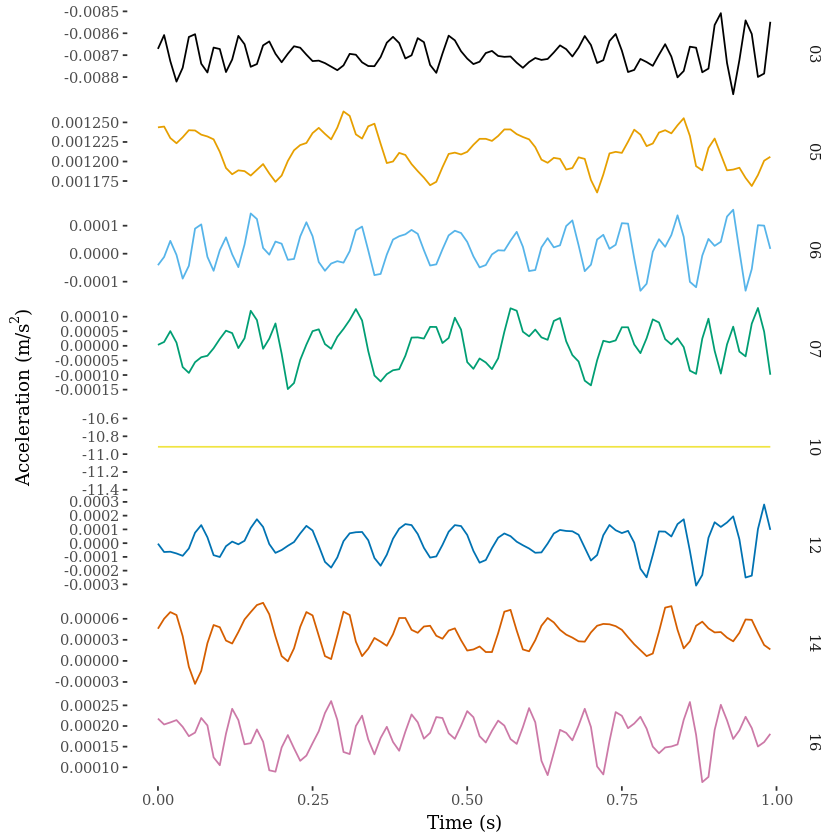

In [16]:
data <- read_csv(file = '../data//z24_vibrations_damaged.csv')
names <- colnames(data)

data$Seconds <- seq(0,nrow(data)-1)*0.01
slice <- head(data,100) 
colnames(slice) <- c(names,"Seconds")
slicetidydf <- gather(slice, key = 'Sensor', value = 'Acceleration', -Seconds)
slicetidydf$Sensor <- as.factor(slicetidydf$Sensor) 

p5d <- ggplot(slicetidydf, aes(x = Seconds, y = Acceleration)) +
geom_line(aes(color = Sensor)) +
facet_grid(Sensor ~ . , scales = "free_y") + 
theme_tufte() +
theme(legend.position = "none") + 
scale_y_continuous(labels = function(x) format(x, scientific = FALSE)) +
scale_color_colorblind() + 
labs(x = "Time (s)", y = expression(paste("Acceleration (m/s"^"2", ")")))

p5d

In [18]:
data <- read_csv(file = '../data//z24_vibrations.csv')
names <- colnames(data)
data <- scale(data)
apply(data, 2, sd)
data <- data.frame(data)

data$Seconds <- seq(0,nrow(data)-1)*0.01
colnames(data) <- c(names,"Seconds")

Parsed with column specification:
cols(
  `03` = col_double(),
  `05` = col_double(),
  `06` = col_double(),
  `07` = col_double(),
  `10` = col_double(),
  `12` = col_double(),
  `14` = col_double(),
  `16` = col_double()
)


03 05 06 07 10 12 14 16 
 1  1  1  1  0  1  1  1

In [19]:
slicedata <- head(data, 10000)
tidydff <- gather(slicedata, key='Sensor', value='Normalized_Acceleration', -Seconds)

In [20]:
p6 <- ggplot(tidydff, aes(x = Seconds, y = Normalized_Acceleration)) +
geom_line(aes(color = Sensor), alpha=1) +
theme_tufte(base_size = 20)+
theme(legend.position="none") +
scale_color_colorblind() +
labs(x = "Time (s)", y = "Normalized Acceleration ")


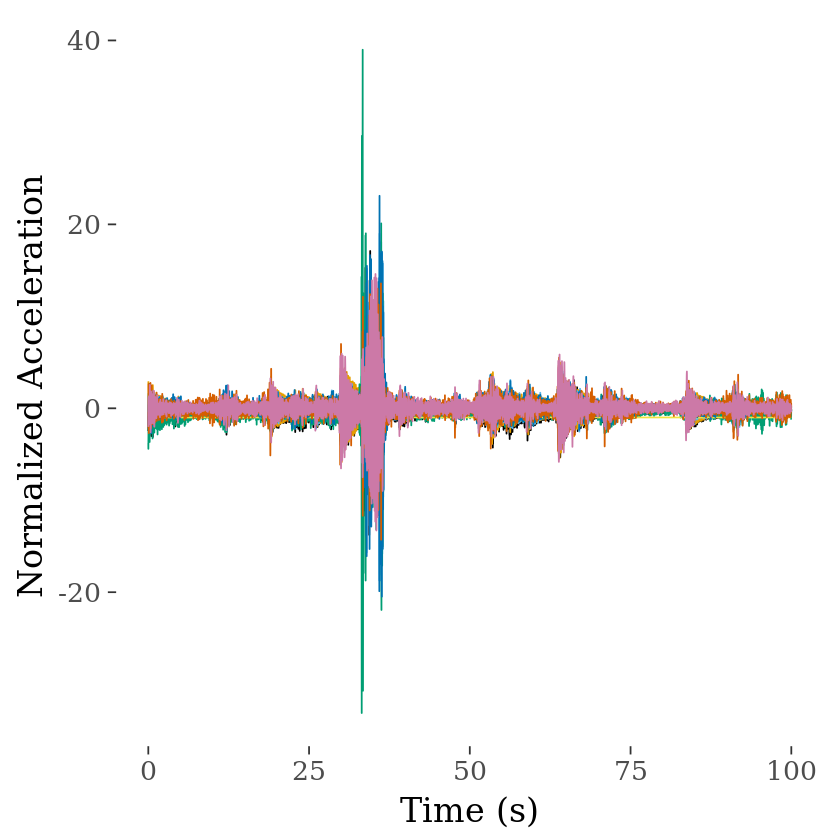

In [21]:
p6

In [22]:
ggsave(filename="z24_stacked_vibration.pdf", plot=p6, width = 10, height = 4)